In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as matimg
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import cv2
import os

In [ ]:
import kagglehub

path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1


In [ ]:
path = pathlib.Path(path)
path = os.path.join(path, 'Rice_Image_Dataset')
path = pathlib.Path(path)

In [ ]:
arborio   = list(path.glob('Arborio/*'))[:100]
basmati   = list(path.glob('Basmati/*'))[:100]
ipsala    = list(path.glob('Ipsala/*'))[:100]
jasmine   = list(path.glob('Jasmine/*'))[:100]
karacadag = list(path.glob('Karacadag/*'))[:100]

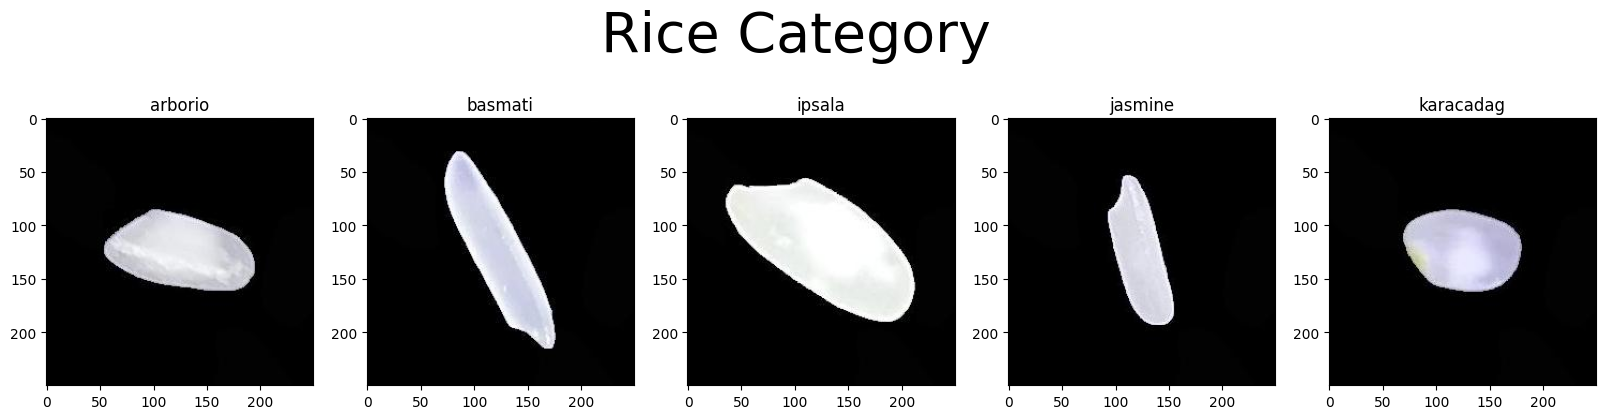

In [ ]:
arborio_img   = matimg.imread(arborio[0])
basmati_img   = matimg.imread(basmati[0])
ipsala_img    = matimg.imread(ipsala[0])
jasmine_img   = matimg.imread(jasmine[0])
karacadag_img = matimg.imread(karacadag[0])

fig,ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle ('Rice Category', fontsize=40)

ax[0].set_title("arborio")
ax[1].set_title("basmati")
ax[2].set_title("ipsala")
ax[3].set_title("jasmine")
ax[4].set_title("karacadag")
ax[0].imshow(arborio_img)

ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

plt.show()

In [ ]:
data_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# numerical labels for the categories
data_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [ ]:
X, y = [], [] # X = images, y = labels
for label, images in data_images.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
    X.append(resized_img)
    y.append(data_labels[label])


X = np.array(X)
X = X/255
y = np.array(y)

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights="imagenet",
                       include_top=False,
                       input_shape=(224, 224, 3))

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
top_model = tf.keras.models.Sequential()
top_model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(tf.keras.layers.Dense(32, activation="relu"))
top_model.add(tf.keras.layers.Dense(10, activation="softmax"))

top_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       2,007,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,007,402 (7.66 MB)

 Trainable params: 2,007,402 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
transfer_model = tf.keras.models.Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 10)                  │       2,007,402 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,265,386 (16.27 MB)

 Trainable params: 2,007,402 (7.66 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - acc: 0.3596 - loss: 7.2545 - val_acc: 0.9688 - val_loss: 0.3032
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.9039 - loss: 0.4084 - val_acc: 0.9375 - val_loss: 0.2906
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.9550 - loss: 0.1280 - val_acc: 0.9375 - val_loss: 0.3721
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.9837 - loss: 0.0401 - val_acc: 0.9688 - val_loss: 0.2487
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 1.0000 - loss: 0.0160 - val_acc: 0.9062 - val_loss: 0.2252
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 1.0000 - loss: 0.0062 - val_acc: 0.9062 - val_loss: 0.2229
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 1.0000 - loss: 0.0029 - val_acc: 0.9375 - val_loss: 0.2236
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 1.0000 - loss: 0.0019 - val_acc: 0.9688 - val_loss: 0.2175
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - acc: 1.0000 - loss: 0.0014 - va

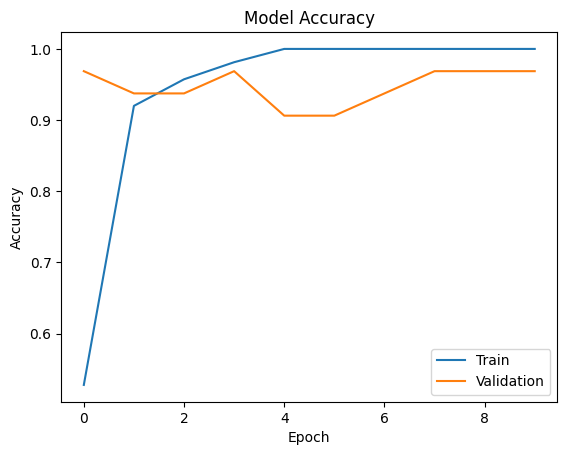

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

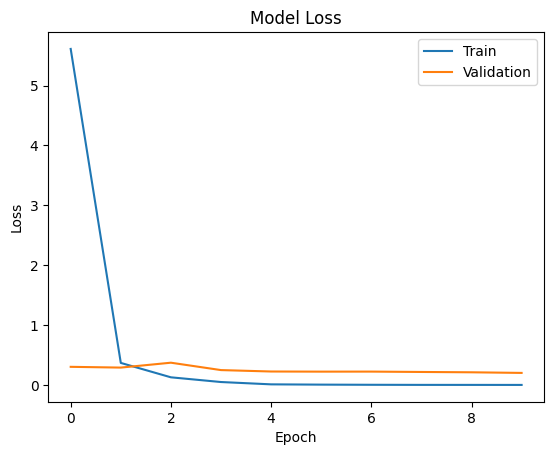

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

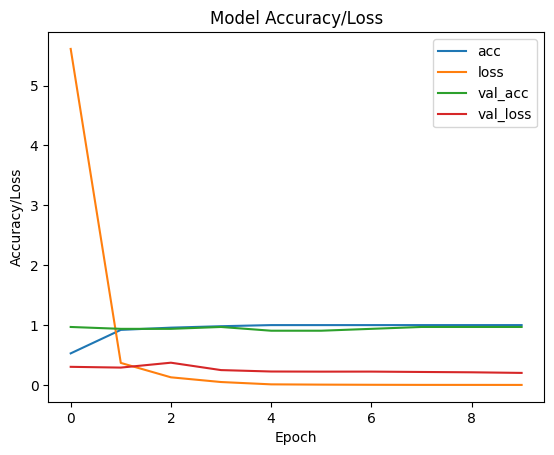

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
transfer_model.evaluate(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.9946 - loss: 0.0177


[0.019361522048711777, 0.9892473220825195]

In [ ]:
img1 = cv2.imread(pathlib.Path(os.path.join(path, 'Basmati', 'basmati (10).jpg')))
img1 = cv2.resize(img1, (224, 224))
img1 = np.array(img1)
img1 = img1/255
img1 = np.expand_dims(img1, 0)
pred = transfer_model.predict(img1)
pred = pred.argmax()
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1

In [ ]:
for i, j in data_labels.items():
  if pred == j:
    print(i)

basmati


In [ ]:
transfer_model.save('rice_classification.h5')

In [ ]:
transfer_model.save('rice_classification.keras')